In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# VGG16
The input size for the VGG-16 convolutional neural network (CNN) is 224 x 224 pixels

In [2]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications import VGG16   # VGG16 is the function name
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Used for image augmentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224,224] # i/p size of an image in vgg16 model

In [4]:
train_data = '/content/drive/MyDrive/Maskdata_Train'
test_data = '/content/drive/MyDrive/Maskdatatest'

In [5]:
# creating object for vgg16
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False) # 3 => RGB channels (3 channels)

# include_top = False => We need only the convolutional layer and pooling layers only no need of i/p layer

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Step need to perform necessarily
# when training the model we dont need to train the already trained model in the vgg16 ie no need to train
# convolutional and pooling layer

for layer in vgg.layers:
  layer.trainable = False

In [7]:
# The output of convolutional and after the pooling layer is in the vgg.output
# vgg.output
# That needs to be flattened
# Dense(2) => classes need to predict is 2

x = Flatten()(vgg.output)
prediction = Dense(2,activation='softmax')(x)

In [8]:
# we can also add hidden layers in the o/p
# Then the execution time will be more
# x = Flatten()(vgg.output)
# x1 = Dense(10,activation='relu')(x)
# x2 = Dense(10,activation='relu')(x1)
# prediction = Dense(2,activation='softmax')(x2)

In [9]:
# creating object for the Model
model1 = Model(inputs=vgg.input,outputs=prediction)

In [10]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255) # no need to zoom or flip the test data. bcz when we test we get the output of that.
training_set = train_datagen.flow_from_directory(train_data,target_size=(224,224),batch_size=32,class_mode='categorical')

# to read the data => flow_from_directory
# class_mode => ie in the training data
# First folder is with_mask so it is assigned as 0
# second is without_mask 1
# the name should be same in testing data also it wont work if the names are different

testing_set = test_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [13]:
# Model Creation
# To pass testing also we pass validation_data
result = model1.fit(training_set,validation_data=testing_set,epochs=5)

# first accuracy is the accuracy of training data
# val_accuracy is the accuracy of testing data

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
31/99 ━━━━━━━━━━━━━━━━━━━━ 8:26 7s/step - accuracy: 0.6271 - loss: 1.0667

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 801s 8s/step - accuracy: 0.7805 - loss: 0.6083 - val_accuracy: 0.9902 - val_loss: 0.0516
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 53s 530ms/step - accuracy: 0.9744 - loss: 0.0752 - val_accuracy: 0.9804 - val_loss: 0.0635
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 52s 525ms/step - accuracy: 0.9843 - loss: 0.0453 - val_accuracy: 0.9902 - val_loss: 0.0257
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 540ms/step - accuracy: 0.9944 - loss: 0.0294 - val_accuracy: 0.9902 - val_loss: 0.0174
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 53s 539ms/step - accuracy: 0.9923 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 0.0131


In [14]:
result.history

{'accuracy': [0.8952381014823914,
  0.9774603247642517,
  0.9853968024253845,
  0.9923809766769409,
  0.9926984310150146],
 'loss': [0.27904412150382996,
  0.06705118715763092,
  0.04554492235183716,
  0.03255055844783783,
  0.030322115868330002],
 'val_accuracy': [0.9901960492134094,
  0.9803921580314636,
  0.9901960492134094,
  0.9901960492134094,
  1.0],
 'val_loss': [0.0515807643532753,
  0.06347347050905228,
  0.025741862133145332,
  0.017399242147803307,
  0.013079172000288963]}

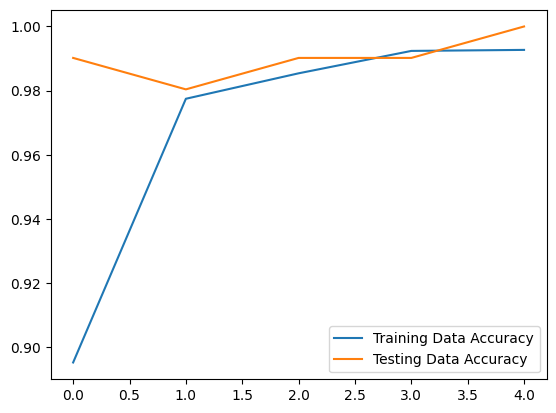

In [15]:
plt.plot(result.history['accuracy'],label='Training Data Accuracy')
plt.plot(result.history['val_accuracy'],label='Testing Data Accuracy')
plt.legend()
plt.show()

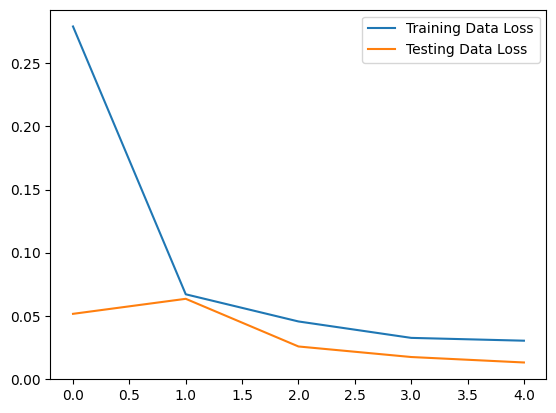

In [16]:
plt.plot(result.history['loss'],label='Training Data Loss')
plt.plot(result.history['val_loss'],label='Testing Data Loss')
plt.legend()
plt.show()

In [17]:
# To save the model we created
model1.save('Model_Transfer.h5')

In [18]:
# Prediction : can use cv2 but it will be difficult so we use skimage
from skimage.io import imread
from skimage.transform import resize

In [19]:
import cv2
from google.colab.patches import cv2_imshow

In [20]:
def predict_new(imgpath,model1):
  img = imread(imgpath)
  cv2_imshow(img)
  img1 = resize(img,(224,224))
  # print(img1.shape)
  img1 = img1.reshape(1,224,224,3)
  # print(img1.shape)
  pred = model1.predict(img1)
  # print(pred)
  ind = pred.argmax()
  # print(ind)
  datadir = os.listdir('/content/drive/MyDrive/Maskdata_Train')
  datadir.sort()
  print(datadir[ind])

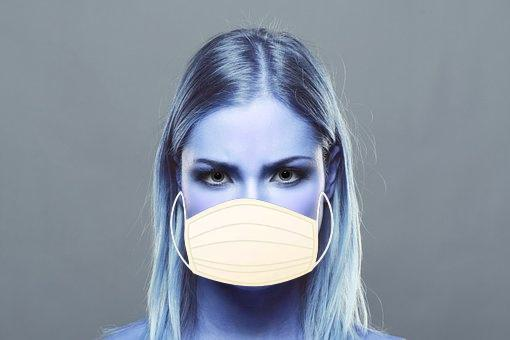

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
with_mask


In [21]:
imgpath = '/content/drive/MyDrive/Maskdata_Train/with_mask/with_mask_1235.jpg'
predict_new(imgpath,model1)

In [22]:
def predict_new(imgpath,model1):
  img = imread(imgpath)
  cv2_imshow(img)
  img1 = resize(img,(224,224))
  # print(img1.shape)
  img1 = img1.reshape(1,224,224,3)
  # print(img1.shape)
  pred = model1.predict(img1)
  # print(pred)
  ind = pred.argmax()
  # print(ind)
  datadir = ['without_mask','with_mask']
  datadir.sort()
  print(datadir[ind])

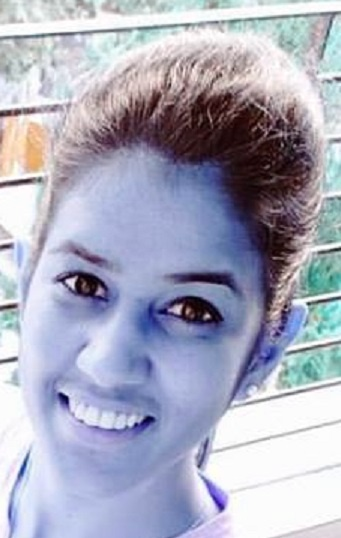

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
without_mask


In [23]:
imgpath = '/content/drive/MyDrive/Maskdata_Train/without_mask/without_mask_1006.jpg'
predict_new(imgpath,model1)